## Gráficos
- Importações 

In [1]:
# Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Base de Dados

In [2]:
# Dados
ds = pd.read_csv('../populacao_e_amostra/census.csv')
ds.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Gráfico de Dispersão

### Gráfico de dispersão

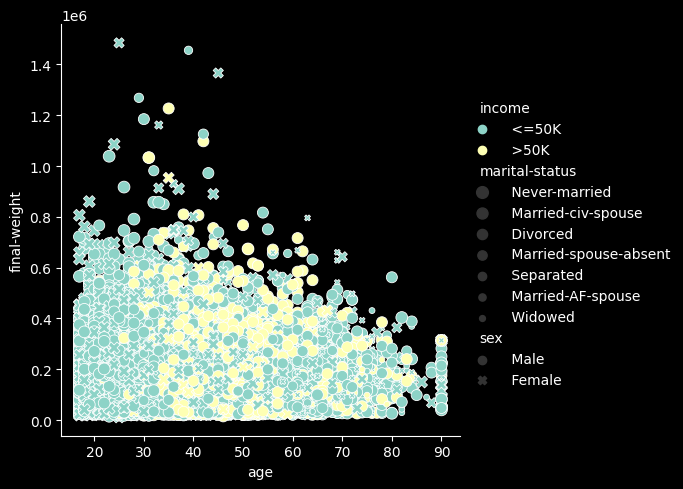

In [3]:
# Gráfico
sns.relplot(
    x='age', y='final-weight', data=ds,
    hue='income', style='sex', size='marital-status'
);

### Gráfico de barra e setor (pizza)

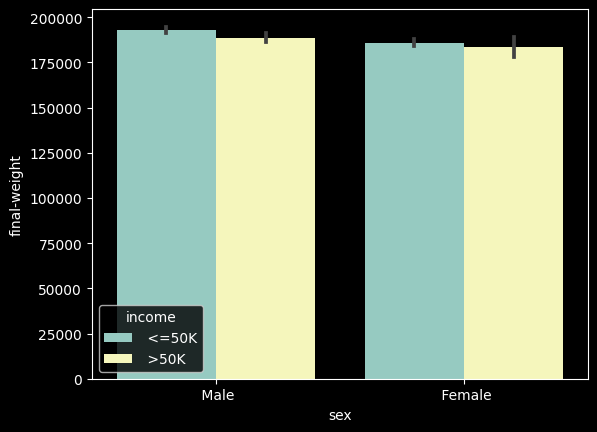

In [4]:
# Gráfico
sns.barplot(x='sex', y='final-weight', data=ds, hue='income'); # hue == agrupamento

In [5]:
# Agrupando os dados
ds_agrupados = ds.groupby(['income'])['education-num'].sum()
ds_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

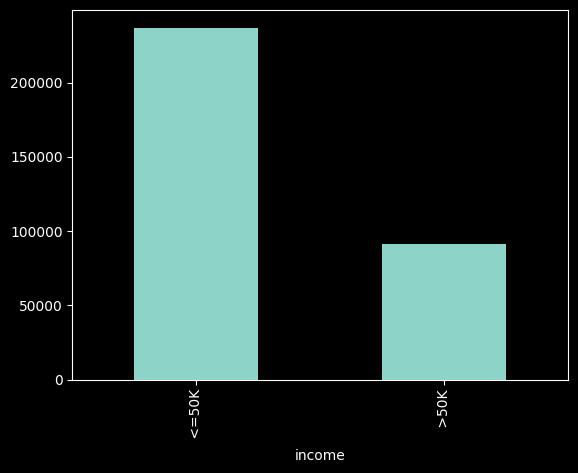

In [6]:
# Gráfico de barra
ds_agrupados.plot.bar();

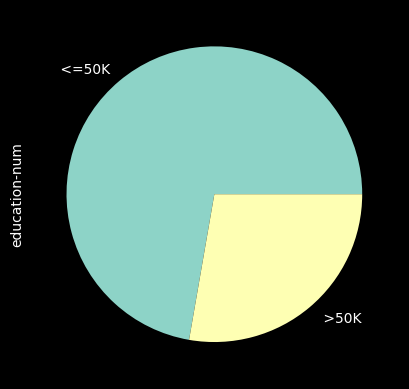

In [7]:
# Gráfico de pizza
ds_agrupados.plot.pie();

### Gráfico de Linha

In [8]:
# Gerando os dados
vendas = {
    'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
    'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])
}

In [9]:
# Transformando os dados em dataframe
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


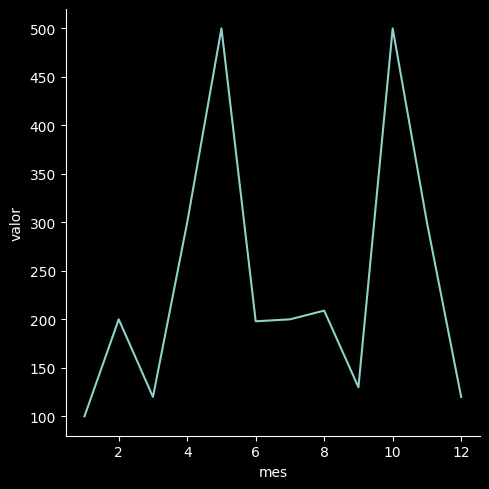

In [10]:
# Gráfico de linhas
sns.relplot(x='mes', y='valor', kind='line', data=vendas_df);

### Boxplot

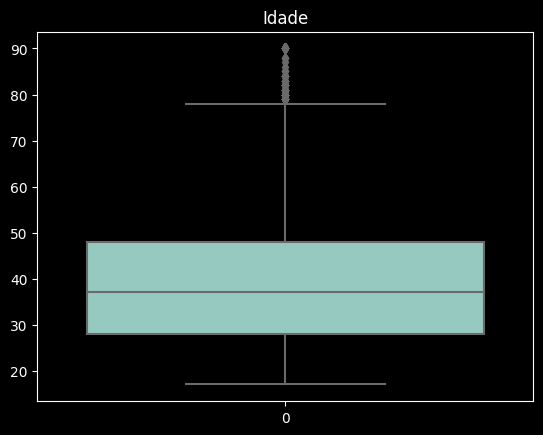

In [11]:
# Boxplot da idade do censo
sns.boxplot(ds['age']);
plt.title('Idade')
plt.show()

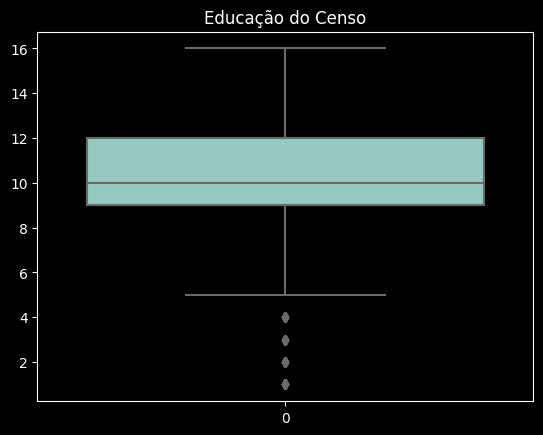

In [12]:
# Boxplot da educação do censo
sns.boxplot(ds['education-num']);
plt.title('Educação do Censo')
plt.show()

In [13]:
# Selecionado de varias colunas
ds2 = ds.iloc[:, [0, 4, 12]]
ds2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


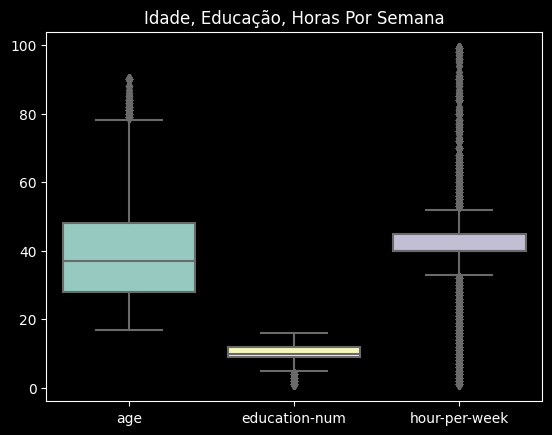

In [14]:
# Gerando o gráfico 
sns.boxplot(ds2);
plt.title('Idade, Educação, Horas Por Semana')
plt.show()

### Gráfico com atributos categóricos

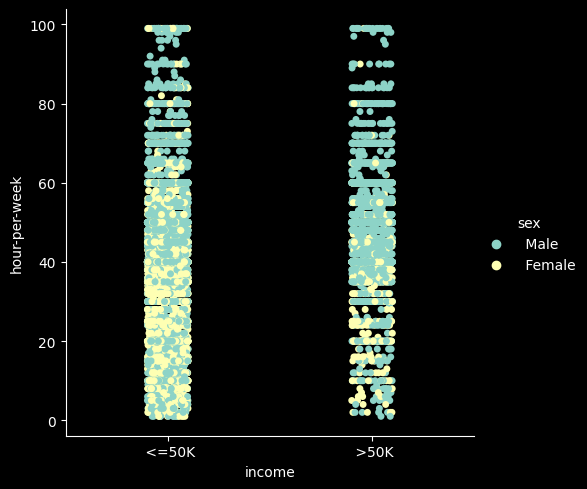

In [15]:
# Gráfico de renda por horas trabalhada agrupada por sexo
sns.catplot(x='income', y='hour-per-week', data=ds, hue='sex');

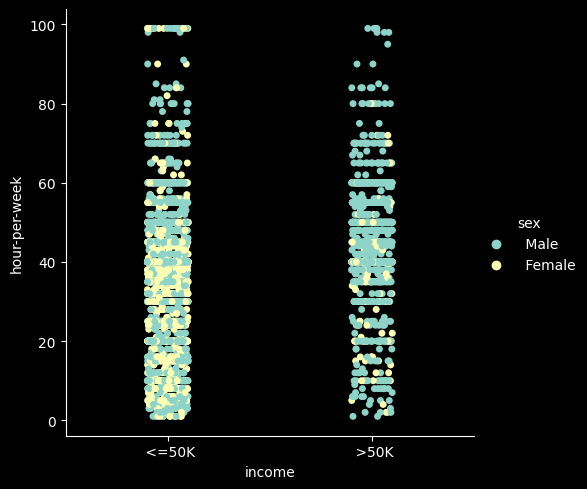

In [16]:
# Gráfico de renda por horas trabalhada agrupada por sexo filtrando por idade
sns.catplot(
    x='income', y='hour-per-week',
    data=ds.query('age>=50'), hue='sex'
);

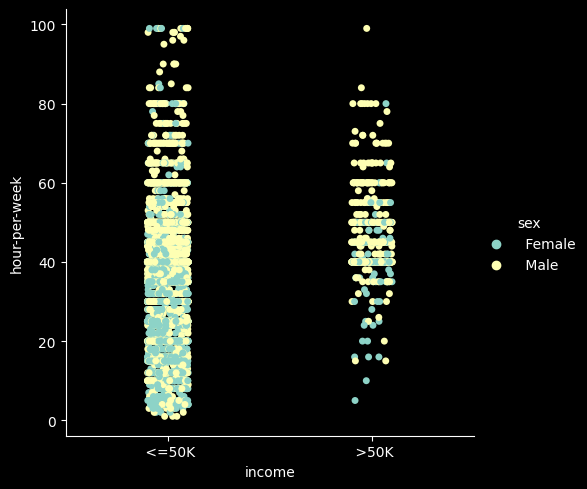

In [17]:
# Gráfico de renda por horas trabalhada agrupada por sexo filtrando por idade
sns.catplot(
    x='income', y='hour-per-week',
    data=ds.query('age<=30'), hue='sex'
);